In [1]:
import pylab as plt
import numpy as np
%matplotlib inline
from glob import glob
import pandas as pd
import netCDF4
from netCDF4 import Dataset
import urllib2
from HTMLParser import HTMLParser
import os
import pickle
import kernels
import datetime
from datetime import date,timedelta
import scipy.sparse

def ensure_dir(f):
    d = os.path.dirname(f)
    if not os.path.exists(d):
        os.makedirs(d)
        
def save_obj(obj, name ):
    ensure_dir('obj/')
    with open('obj/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('obj/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [2]:
datakeys = np.array(['bbdr.flags', 'bbdr.meris', 'bbdr.vgt', 'ga.brdf.merge',\
       'ga.brdf.nosnow', 'ga.brdf.snow', 'mod09', 'myd09',\
       'prior.v2.nosnow', 'prior.v2.snow', 'prior.v2.snownosnow', 'D1'])

Ab = {}
for k in datakeys:
    k = k.strip('/')
    try:
        Ab[k] = load_obj('Ab_store_%s'%k)
    except:
        pass
print Ab.keys()

['myd09', 'bbdr.vgt', 'prior.v2.snow', 'mod09', 'prior.v2.nosnow', 'bbdr.meris', 'D1']


In [3]:
nelemen = Ab['mod09']['b'].shape[0]/Ab['mod09']['doys'][-1]
print nelemen

9


In [28]:
# we can form various combinations now and solve
gamma = 100000.0
s = 0.00000001
s1 = 10000.
A = gamma * Ab['D1']['A'] + 0*Ab['mod09']['A']\
    + s1*Ab['myd09']['A'] \
    + s1*Ab['bbdr.meris']['A'] \
    + s*Ab['prior.v2.nosnow']['A']
b = gamma * Ab['D1']['b'] + 0*Ab['mod09']['b']\
    + s1*Ab['myd09']['b']\
    + s1*Ab['bbdr.meris']['b']\
    + s*Ab['prior.v2.nosnow']['b']

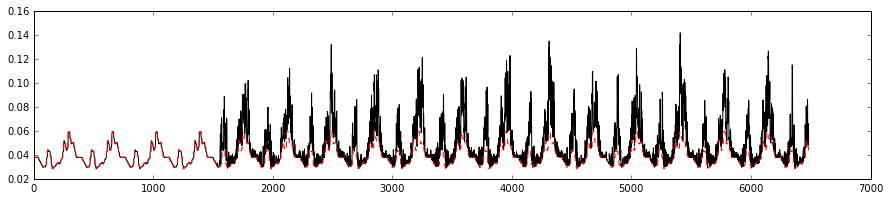

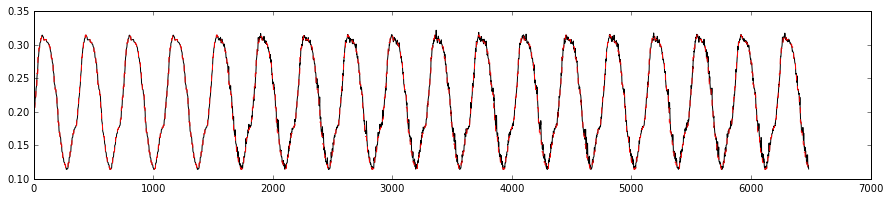

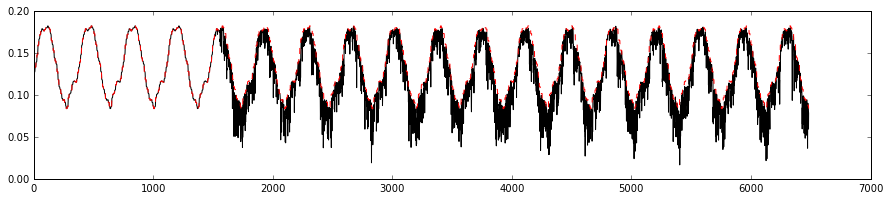

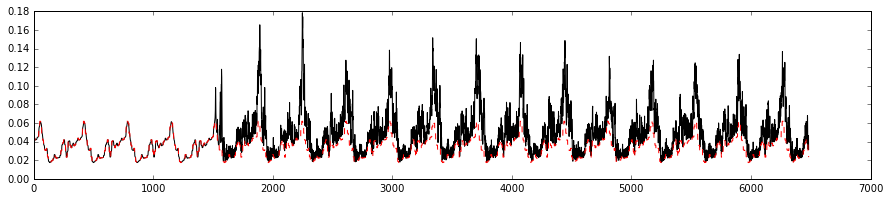

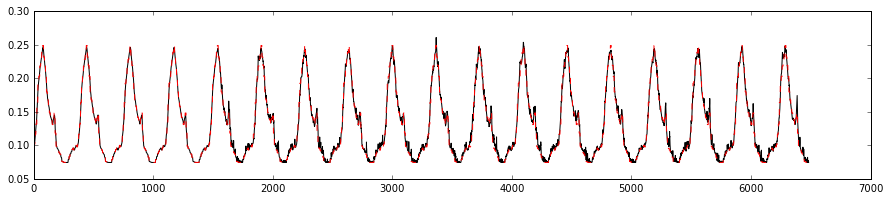

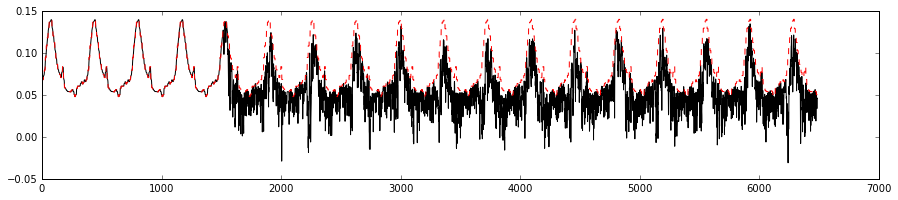

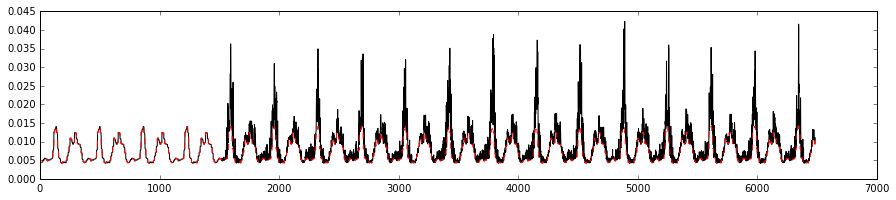

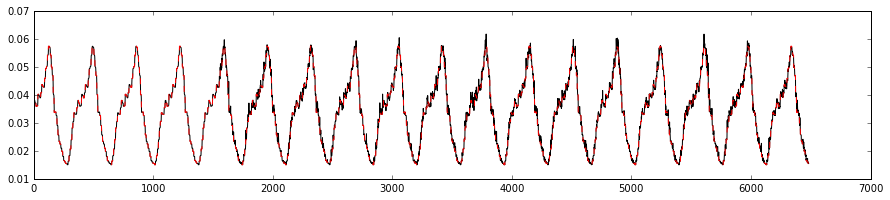

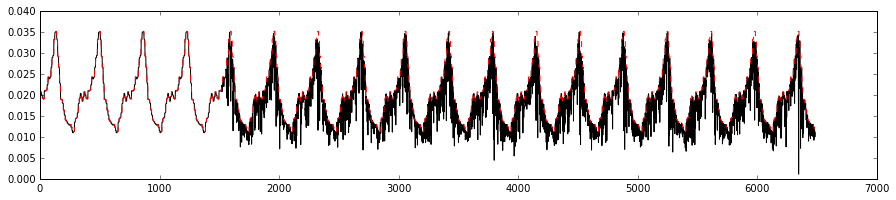

In [29]:
from scipy.sparse.linalg import spsolve
x = spsolve(A, b)
xp = spsolve(Ab['prior.v2.nosnow']['A'], Ab['prior.v2.nosnow']['b'])
for i in xrange(9):
    plt.figure(figsize=(15,3))
    plt.plot(x[i::nelemen],'k')
    plt.plot(xp[i::nelemen],'r--')

Our model is:

x = (A1 + A2 + A3).I (b1 + b2 + b3)


so, if we have:

x1 = A1.I b1
x2 = A2.I b2
x3 = A3.I b3


we can combine:

(A1 + A2 + A3).I (x1 A1 + x2 A2 + x3 A3)
